# gorey
## 1 Telluric correction
### VIII- Generate per-order HDF5 files needed for chunking, also trim off the order ends.

Michael Gully-Santiago  
Wednesday, March 29, 2017  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
from astropy.io import fits
import h5py

## Set the date

In [3]:
date = 20161119

## H band

In [4]:
hdu_raw = fits.open('../data/raw/20161119/SDCH_20161119_0130.spec.fits')
hdu_f   = fits.open('../data/raw/20161119/SDCH_20161119_0130.spec_flattened.fits')
hdu_var = fits.open('../data/raw/20161119/SDCH_20161119_0130.variance.fits')
hdu_tar = fits.open('../data/raw/20161119/SDCH_20161119_0124.spec.fits')
tar_var = fits.open('../data/raw/20161119/SDCH_20161119_0124.variance.fits')
hdr = hdu_tar[0].header

### Do the telluric correction
$ f_{\star} = \frac{f_{raw, \star}}{f_{raw, std}} \times \hat{f}_{std}$

$ \sigma_{\star} = f_{\star} \sqrt{ \left( \frac{\sigma_{raw, std}}{f_{raw, std}}\right)^2 + \left( \frac{\sigma_{raw, \star}}{f_{raw,\star}} \right)^2 } \times \hat{f}_{std}$

In [5]:
f_hat_std = hdu_f[4].data/np.nanmean(hdu_f[4].data)
f_star = hdu_tar[0].data/hdu_raw[0].data*f_hat_std
term1 = hdu_var[0].data / hdu_raw[0].data**2
term2 = tar_var[0].data / hdu_tar[0].data**2
sig_star = f_star * np.sqrt( term1 + term2 )*f_hat_std

## Plot it

We will trim between pixel 450 and 1950.

(0.0, 1.2)

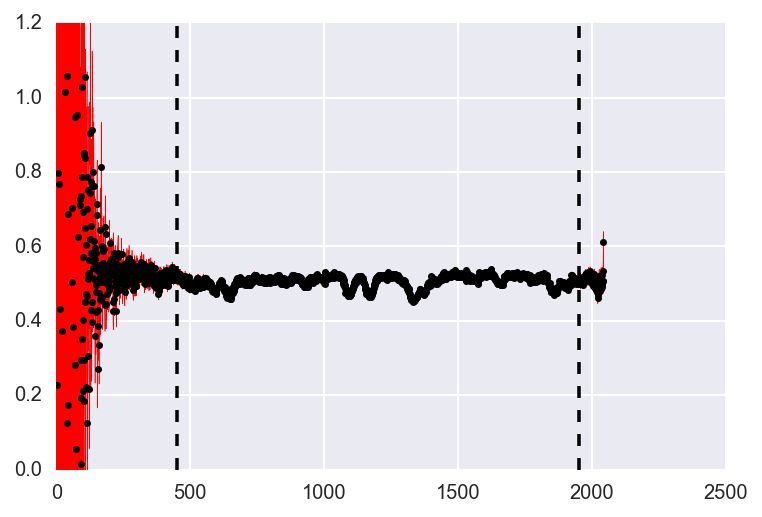

In [6]:
o=16
fls_out = f_star[o,:]
sig_out = sig_star[o,:]
wls_out = hdu_tar[1].data[o,:]*10000.0
sig = sig_out

pix = np.arange(2048)
plt.plot(pix, fls_out, 'k.')

plt.fill_between(pix, fls_out-sig, fls_out+sig, color='r')

plt.vlines(450, 0, 2, linestyles='--')
plt.vlines(1950, 0, 2, linestyles='--')
plt.ylim(0.0, 1.2)

In [7]:
lft = 450
rgt = 1950

for o in range(28):
    m = o + 98
    out_name = '../data/reduced/GWOri_IGRINS_{}_m{:03d}.hdf5'.format(date, m)
    fls_out = f_star[o,lft:rgt]
    sig_out = sig_star[o,lft:rgt]
    wls_out = hdu_tar[1].data[o,lft:rgt]*10000.0
    msk_out = np.ones(len(wls_out), dtype=int)
    f_new = h5py.File(out_name, 'w')
    f_new.create_dataset('fls', data=fls_out)
    f_new.create_dataset('wls', data=wls_out)
    f_new.create_dataset('sigmas', data=sig_out)
    f_new.create_dataset('masks', data=msk_out)
    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls_out[0], wls_out[-1], out_name))
    f_new.close()

098: 18155  -  18336   ../data/reduced/GWOri_IGRINS_20161119_m098.hdf5
099: 17976  -  18156   ../data/reduced/GWOri_IGRINS_20161119_m099.hdf5
100: 17801  -  17979   ../data/reduced/GWOri_IGRINS_20161119_m100.hdf5
101: 17629  -  17806   ../data/reduced/GWOri_IGRINS_20161119_m101.hdf5
102: 17461  -  17636   ../data/reduced/GWOri_IGRINS_20161119_m102.hdf5
103: 17296  -  17469   ../data/reduced/GWOri_IGRINS_20161119_m103.hdf5
104: 17134  -  17306   ../data/reduced/GWOri_IGRINS_20161119_m104.hdf5
105: 16976  -  17146   ../data/reduced/GWOri_IGRINS_20161119_m105.hdf5
106: 16820  -  16989   ../data/reduced/GWOri_IGRINS_20161119_m106.hdf5
107: 16668  -  16834   ../data/reduced/GWOri_IGRINS_20161119_m107.hdf5
108: 16518  -  16683   ../data/reduced/GWOri_IGRINS_20161119_m108.hdf5
109: 16371  -  16535   ../data/reduced/GWOri_IGRINS_20161119_m109.hdf5
110: 16227  -  16389   ../data/reduced/GWOri_IGRINS_20161119_m110.hdf5
111: 16085  -  16246   ../data/reduced/GWOri_IGRINS_20161119_m111.hdf5
112: 1

## K-band

In [8]:
hdu_raw = fits.open('../data/raw/20161119/SDCK_20161119_0130.spec.fits')
hdu_f   = fits.open('../data/raw/20161119/SDCK_20161119_0130.spec_flattened.fits')
hdu_var = fits.open('../data/raw/20161119/SDCK_20161119_0130.variance.fits')
hdu_tar = fits.open('../data/raw/20161119/SDCK_20161119_0124.spec.fits')
tar_var = fits.open('../data/raw/20161119/SDCK_20161119_0124.variance.fits')
hdr = hdu_tar[0].header

In [9]:
f_hat_std = hdu_f[4].data/np.nanmean(hdu_f[4].data)
f_star = hdu_tar[0].data/hdu_raw[0].data*f_hat_std
term1 = hdu_var[0].data / hdu_raw[0].data**2
term2 = tar_var[0].data / hdu_tar[0].data**2
sig_star = f_star * np.sqrt( term1 + term2 )*f_hat_std

In [10]:
lft = 450
rgt = 1950

for o in range(26):
    m = o + 71
    out_name = '../data/reduced/GWOri_IGRINS_{}_m{:03d}.hdf5'.format(date, m)
    fls_out = f_star[o,lft:rgt]
    sig_out = sig_star[o,lft:rgt]
    wls_out = hdu_tar[1].data[o,lft:rgt]*10000.0
    msk_out = np.ones(len(wls_out), dtype=int)
    f_new = h5py.File(out_name, 'w')
    f_new.create_dataset('fls', data=fls_out)
    f_new.create_dataset('wls', data=wls_out)
    f_new.create_dataset('sigmas', data=sig_out)
    f_new.create_dataset('masks', data=msk_out)
    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls_out[0], wls_out[-1], out_name))
    f_new.close()

071: 24928  -  25173   ../data/reduced/GWOri_IGRINS_20161119_m071.hdf5
072: 24586  -  24828   ../data/reduced/GWOri_IGRINS_20161119_m072.hdf5
073: 24254  -  24493   ../data/reduced/GWOri_IGRINS_20161119_m073.hdf5
074: 23930  -  24166   ../data/reduced/GWOri_IGRINS_20161119_m074.hdf5
075: 23616  -  23849   ../data/reduced/GWOri_IGRINS_20161119_m075.hdf5
076: 23309  -  23540   ../data/reduced/GWOri_IGRINS_20161119_m076.hdf5
077: 23011  -  23239   ../data/reduced/GWOri_IGRINS_20161119_m077.hdf5
078: 22720  -  22946   ../data/reduced/GWOri_IGRINS_20161119_m078.hdf5
079: 22437  -  22660   ../data/reduced/GWOri_IGRINS_20161119_m079.hdf5
080: 22161  -  22381   ../data/reduced/GWOri_IGRINS_20161119_m080.hdf5
081: 21892  -  22110   ../data/reduced/GWOri_IGRINS_20161119_m081.hdf5
082: 21630  -  21845   ../data/reduced/GWOri_IGRINS_20161119_m082.hdf5
083: 21374  -  21586   ../data/reduced/GWOri_IGRINS_20161119_m083.hdf5
084: 21124  -  21334   ../data/reduced/GWOri_IGRINS_20161119_m084.hdf5
085: 2

### The end!